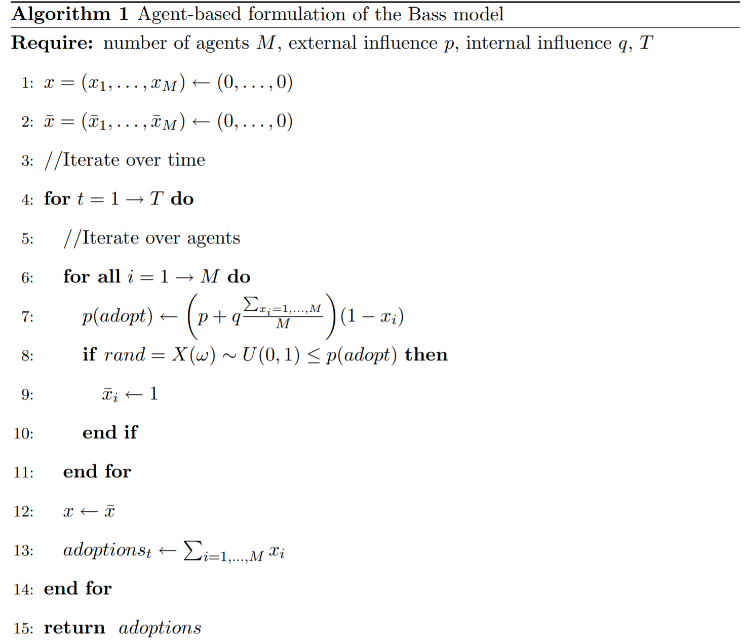

In [44]:
# wypróbować różne grafy (100 nodów) - complete graph, erdos-renyi, watts-strogratz (k=4, beta<0.2), barabasi (m=n0=2), random regular (d=4)
# nie iterujemy po wszystkich agentach, tylko po M wylosowanych 
# trajektoria w czasie uśredniona po 100 symulacjach
# zamiast p(adopt) jeśli agent i jest niezaadaptowany, to sprawdzamy czy uniform < p+q*Fi, gdzie Fi - frakacja zaadaptowanych sąsiadów
# wszystkie sieci na jednym wykresie, 9 subplotów dla 3 różnych wartości q i p
# oprócz frakcji zaadaptowanych jeszcze wykres przyrostów zaadaptowanych
# napisać samemu wszystkie grafy

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from itertools import combinations

In [29]:
plt.rcParams['figure.dpi'] = 130
style.use('seaborn-v0_8')

In [93]:
def random_graph(N, p):

    nodes = np.arange(0, N)
    edges = list(combinations(nodes, 2))
    unifs = np.random.uniform(size=len(edges))
    neighbors = {n: [] for n in range(N)}

    for i in range(len(edges)):
        n1, n2 = edges[i]
        if unifs[i] <= p:
            neighbors[n1].append(n2)
            neighbors[n2].append(n1)
    
    return nodes, neighbors

In [151]:
def regular_random_graph(N, d):

    assert d < N
    assert (N * d) % 2 == 0
    assert d != 0

    nodes = np.arange(0, N)
    neighbors = {n: [] for n in range(N)}
    half_edges_ordered = list(range(N)) * d

    def _try_create_rrg():

        half_edges = list(np.random.permutation(half_edges_ordered))

        while len(half_edges) > 0:
            n1 = half_edges.pop()
            n2 = half_edges.pop()

            attempts = 0
            while (n1 == n2) or (n2 in neighbors[n1]):
                half_edges.append(n2)
                n2 = half_edges.pop()
                attempts += 1

                if attempts > len(half_edges):
                    return None, None

            neighbors[n1].append(n2)
            neighbors[n2].append(n1)
        
        return nodes, neighbors
    
    Nodes, Neighbors = _try_create_rrg()
    while (Nodes is None) and (Neighbors is None):
        Nodes, Neighbors = _try_create_rrg()
    
    return Nodes, Neighbors

In [ ]:
def regular_random_graph(N, d):

    assert d < N
    assert (N * d) % 2 == 0
    assert d != 0

    nodes = np.arange(0, N)
    neighbors = {n: [] for n in range(N)}
    half_edges_ordered = list(range(N)) * d

    def _proper_edges()

In [155]:
n, ne = regular_random_graph(100, 4)

KeyboardInterrupt: 

In [143]:
dupa = np.arange(1, 10)

In [144]:
dupa2 = np.random.permutation(dupa)
dupa2

array([5, 8, 1, 6, 9, 4, 3, 7, 2])

In [24]:
def bass(M, p, q, T):

    x = np.zeros(M)
    x_line = np.zeros(M)
    unifs = np.random.uniform(size=T*M)
    slicer = np.array([0, M])
    adoptions = np.zeros(T)

    for t in range(T):

        slicer_new = slicer + t*M
        u = unifs[slicer_new[0]:slicer_new[1]]
    
        for i in range(M): 

            p_adopt = (p + q * np.mean(x)) * (1 - x[i])

            if u[i] <= p_adopt:
                x_line[i] = 1

        x = x_line 
        adoptions[t] = np.sum(x)
    
    return adoptions


In [39]:
b1 = bass(1000, 0.03, 0.38, 20)

for i in range(100):
    b1 = np.vstack((b1, bass(1000, 0.03, 0.38, 20)))

In [41]:
b1 = np.mean(b1, axis=0)

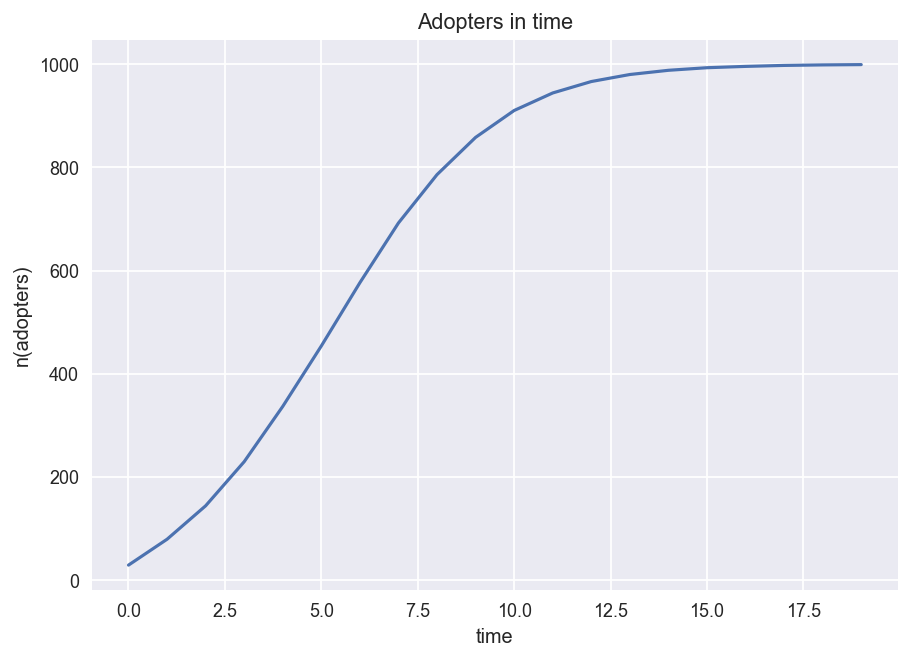

In [42]:
plt.plot(b1)
plt.title('Adopters in time')
plt.xlabel('time')
plt.ylabel('n(adopters)')
plt.show()